# Import python libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sn
%matplotlib inline
sn.set_style("darkgrid")

/home/java/dbda/home/java/Desktop/HORIZON2020

# Read the datasets

In [9]:
crimes1 = pd.read_csv('/home/java/Desktop/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('/home/java/Desktop/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2013.csv')

# Concatenate the datasets

In [10]:
df = pd.concat([crimes1, crimes2])


df.rename(columns={'STATE/UT':'STATE_UT','Dowry Deaths':'Dowry','Assault on women with intent to outrage her modesty':'Assault'},inplace=True)
#print(df)

df.columns

#state_agg_dowry = state_grp.sum().reset_index().sort_values(by='Dowry Deaths')
#state_agg_assault = state_grp.sum().reset_index().sort_values(by='Assault on women with intent to outrage her modesty')

Index(['STATE_UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry', 'Assault', 'Insult to modesty of Women',
       'Cruelty by Husband or his Relatives', 'Importation of Girls'],
      dtype='object')

# Check the structure of dataframe

In [11]:
df.shape

(9840, 10)

# Data clean up . Merging states and district names with separate casing to one

In [13]:
df['STATE_UT'] = df.STATE_UT.str.replace('\s+&\s+', '&')
df['DISTRICT'] = df.DISTRICT.apply(lambda x: x.replace('\s+&\s+', '&'))

print(df)

              STATE_UT           DISTRICT  Year  Rape  \
0       ANDHRA PRADESH           ADILABAD  2001    50   
1       ANDHRA PRADESH          ANANTAPUR  2001    23   
2       ANDHRA PRADESH           CHITTOOR  2001    27   
3       ANDHRA PRADESH           CUDDAPAH  2001    20   
4       ANDHRA PRADESH      EAST GODAVARI  2001    23   
5       ANDHRA PRADESH      GUNTAKAL RLY.  2001     0   
6       ANDHRA PRADESH             GUNTUR  2001    54   
7       ANDHRA PRADESH     HYDERABAD CITY  2001    37   
8       ANDHRA PRADESH         KARIMNAGAR  2001    56   
9       ANDHRA PRADESH            KHAMMAM  2001    47   
10      ANDHRA PRADESH            KRISHNA  2001    37   
11      ANDHRA PRADESH            KURNOOL  2001    29   
12      ANDHRA PRADESH      MAHABOOBNAGAR  2001    59   
13      ANDHRA PRADESH              MEDAK  2001    35   
14      ANDHRA PRADESH           NALGONDA  2001    35   
15      ANDHRA PRADESH            NELLORE  2001    46   
16      ANDHRA PRADESH         

# Remove Total field from the dataset

In [14]:
no_total_I = df.loc[df.DISTRICT !='TOTAL', :]
no_total_F = no_total_I.loc[no_total_I.DISTRICT !='ZZ TOTAL', :]

no_total_F

,STATE_UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry,Assault,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,0,0,1,0,0,0
6,ANDHRA PRADESH,GUNTUR,2001,54,51,7,139,129,378,0
7,ANDHRA PRADESH,HYDERABAD CITY,2001,37,39,24,118,27,746,0
8,ANDHRA PRADESH,KARIMNAGAR,2001,56,49,62,414,81,224,0
9,ANDHRA PRADESH,KHAMMAM,2001,47,30,17,180,336,172,0


# Aggregate the values by year

In [15]:
year_totals = no_total_F.groupby('Year')
year_agg = year_totals.sum().reset_index()


year_agg

,Year,Rape,Kidnapping and Abduction,Dowry,Assault,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,2001,16456,15609,6964,34626,9836,49308,114
1,2002,16776,15399,6957,34389,10283,49372,76
2,2003,16337,14093,6338,33428,12430,51914,46
3,2004,18784,16459,7152,35168,10131,59375,89
4,2005,19017,16856,6901,34937,10209,59643,150
5,2006,19971,18480,7755,37335,10110,64856,67
6,2007,21335,21583,8231,39602,11117,77717,61
7,2008,21933,24075,8301,41024,12344,82731,67
8,2009,21866,27396,8524,39263,11127,90829,48
9,2010,22679,31535,8534,41214,10041,95445,36


# Describe data frame for statistical summary

In [16]:
year_agg.describe()


,Year,Rape,Kidnapping and Abduction,Dowry,Assault,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2007.00000,21482.153846,25495.230769,7759.000000,40879.076923,10640.769231,77636.769231,71.076923
std,3.89444,4733.161485,11759.235917,794.676978,9780.019951,1206.059711,23780.808429,32.627855
min,2001.00000,16337.000000,14093.000000,6338.000000,33428.000000,8732.000000,49308.000000,31.000000
25%,2004.00000,18784.000000,16459.000000,6964.000000,34937.000000,10041.000000,59375.000000,48.000000
50%,2007.00000,21335.000000,21583.000000,8083.000000,39263.000000,10209.000000,77717.000000,67.000000
75%,2010.00000,22679.000000,31535.000000,8367.000000,41214.000000,11127.000000,95445.000000,80.000000
max,2013.00000,33707.000000,51881.000000,8760.000000,70739.000000,12589.000000,118866.000000,150.000000


# Graphical Representation of statistical data by Year and Crime

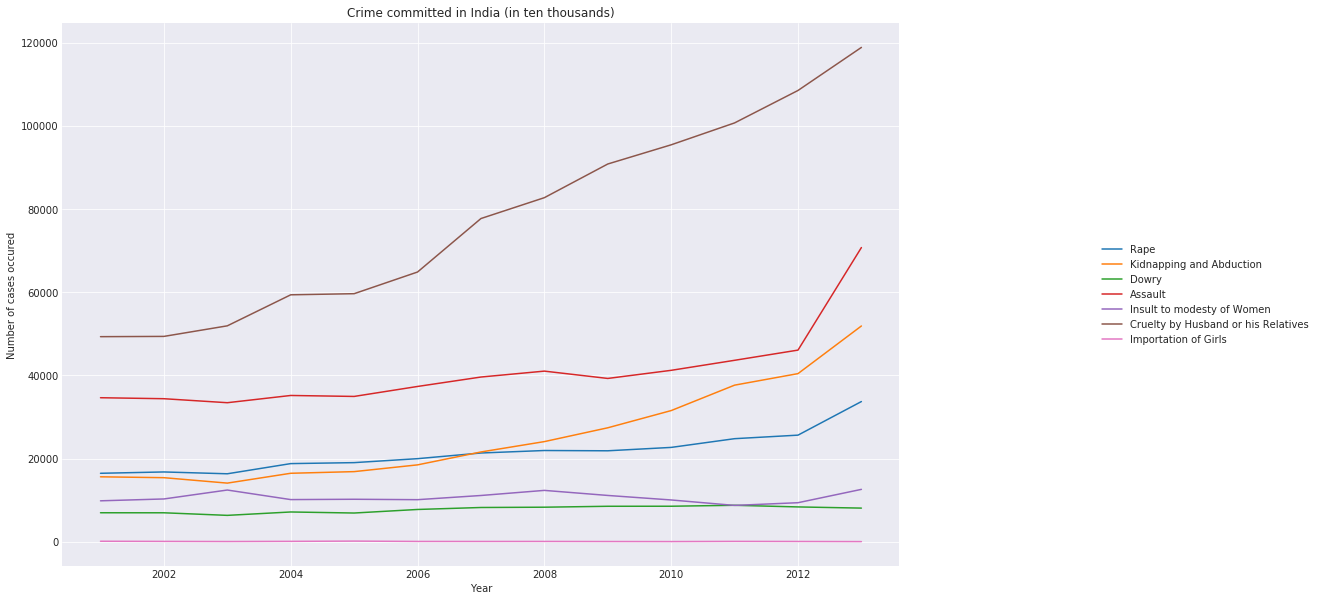

In [17]:
cols = list(year_agg.columns)
cols.remove('Year')
fig = mplt.figure()
fig.set_size_inches(15, 10)
ax = mplt.subplot(111)

ax.set_title("Crime committed in India (in ten thousands)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of cases occured")
for col in cols:
    ax.plot(year_agg.Year, year_agg[col], label=col.replace('_', ' '))
ax.legend(loc=5, bbox_to_anchor=(1.5, .5))

# Correlation between types of crime on women

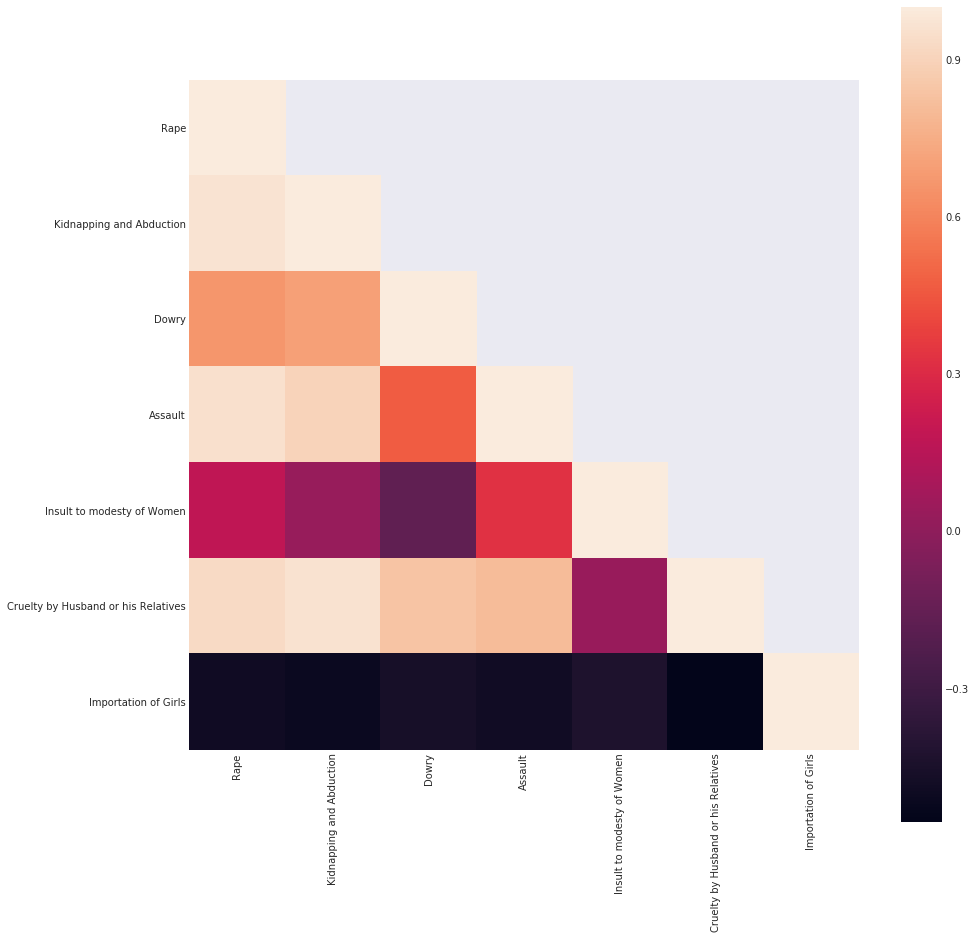

In [18]:
corr = year_agg[cols].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = mplt.subplots()
fig.set_size_inches(15, 15)
sn.heatmap(corr, mask=mask, ax=ax, square=True)

# Frequency distribution of crimes by states

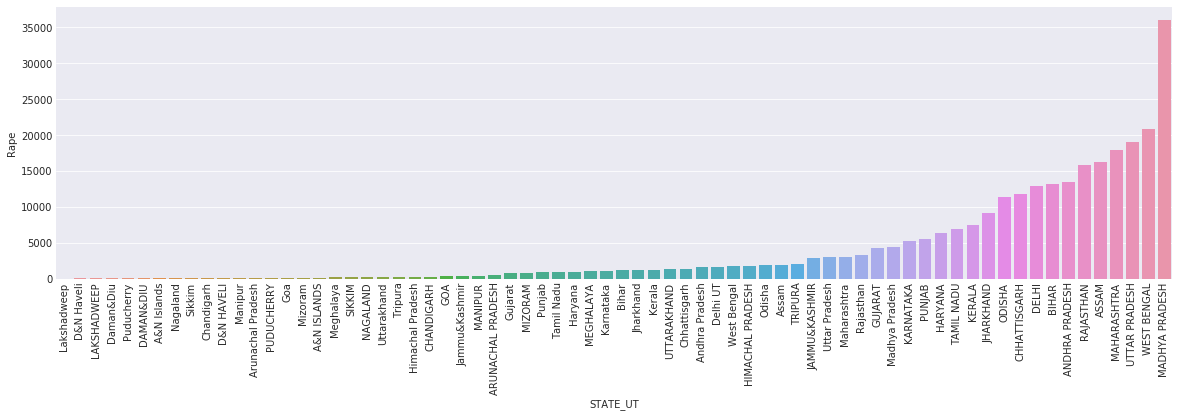

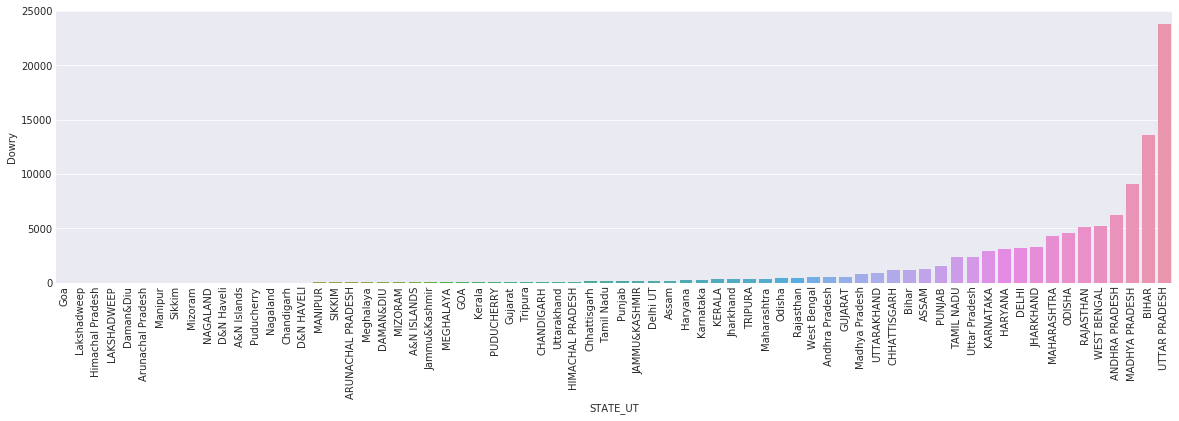

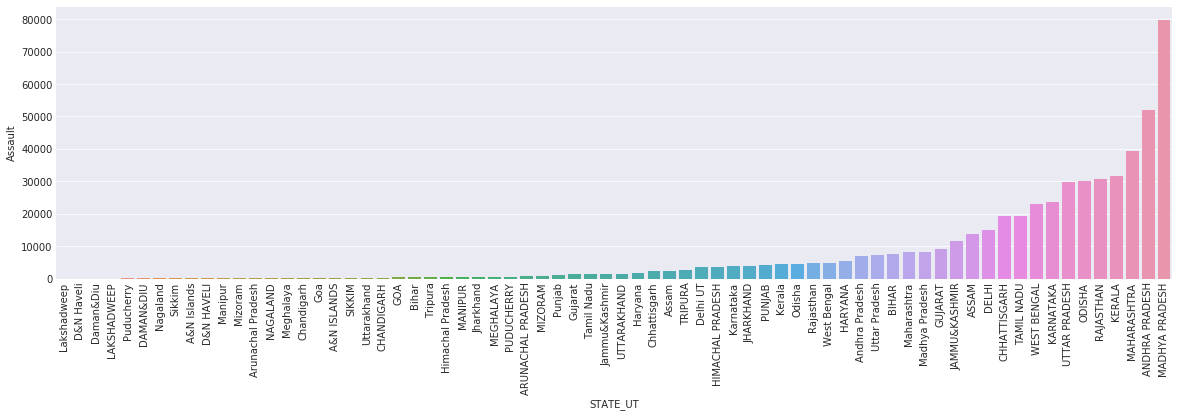

In [19]:
#print(no_total_F)
group_by = ["STATE_UT"]
columns_of_interest_rape = ["Rape"]
columns_of_interest_assault= ["Assault"]
columns_of_interest_dowry= ["Dowry"]
state_grp = no_total_F[columns_of_interest_rape + group_by].groupby(["STATE_UT"])

state_grp1 = no_total_F[columns_of_interest_dowry + group_by].groupby(["STATE_UT"])

state_grp2 = no_total_F[columns_of_interest_assault + group_by].groupby(["STATE_UT"])

state_agg_rape = state_grp.sum().reset_index().sort_values(by='Rape')
state_agg_dowry = state_grp1.sum().reset_index().sort_values(by='Dowry')
state_agg_assault = state_grp2.sum().reset_index().sort_values(by='Assault')

state_agg_rape['Rape'] = state_agg_rape.Rape
state_agg_dowry['Dowry'] = state_agg_dowry.Dowry
state_agg_assault['Assault'] = state_agg_assault.Assault

fig = mplt.figure()
fig.set_size_inches(20, 5)
ax = fig.add_subplot(111)
ax.set_xticklabels(state_agg_rape.STATE_UT, rotation=90)
b = sn.barplot(x='STATE_UT', y='Rape', data=state_agg_rape, ax=ax)

fig2 = mplt.figure()
fig2.set_size_inches(20, 5)
ax = fig2.add_subplot(111)

ax.set_xticklabels(state_agg_dowry.STATE_UT, rotation=90)
c = sn.barplot(x='STATE_UT', y='Dowry', data=state_agg_dowry, ax=ax)

fig3 = mplt.figure()
fig3.set_size_inches(20, 5)
ax = fig3.add_subplot(111)

ax.set_xticklabels(state_agg_assault.STATE_UT, rotation=90)
d = sn.barplot(x='STATE_UT', y='Assault', data=state_agg_assault, ax=ax)